# CODE TO PREDICT STOCK MARKET PRICE

# TASK #1: LIBRARIES KEY LIBRARIES AND DATASETS 

In [2]:
# This dataset is created for prediction of the S&P 500 stock index based on interest rates and employment numbers.
# import key libraries and datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
stock = pd.read_csv("S&P500_Stock_Data.csv")

In [4]:
stock.head(10)

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663
5,2.143637,56.060598,2187.344909
6,2.148647,51.513208,2263.049249
7,2.176184,53.475909,2281.496374
8,2.125352,63.668422,2355.163011
9,2.225682,56.993396,2326.330337


In [5]:
stock.tail()

,Interest Rates,Employment,S&P 500 Price
995,2.528420,52.390828,2578.699184
996,2.643571,54.626204,2573.865933
997,2.009644,57.004357,2004.911218
998,2.201656,62.447790,2344.098981
999,2.180638,46.297034,2156.133786


In [6]:
stock.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764328
max,3.000000,70.000000,3000.000000


In [7]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


# TASK #2: PERFORM DATA VISUALIZATION

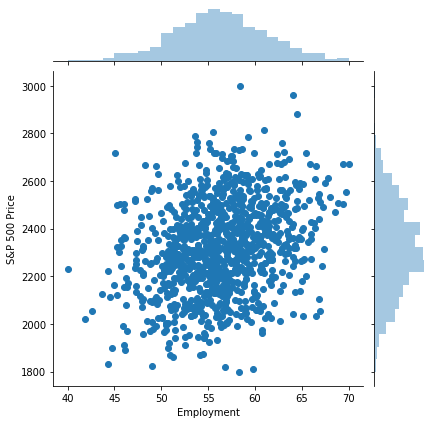

In [8]:
sns.jointplot(x='Employment', y='S&P 500 Price', data=stock)

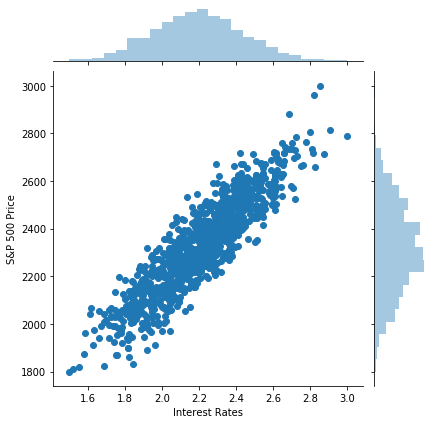

In [9]:
sns.jointplot(x='Interest Rates', y='S&P 500 Price',data=stock)

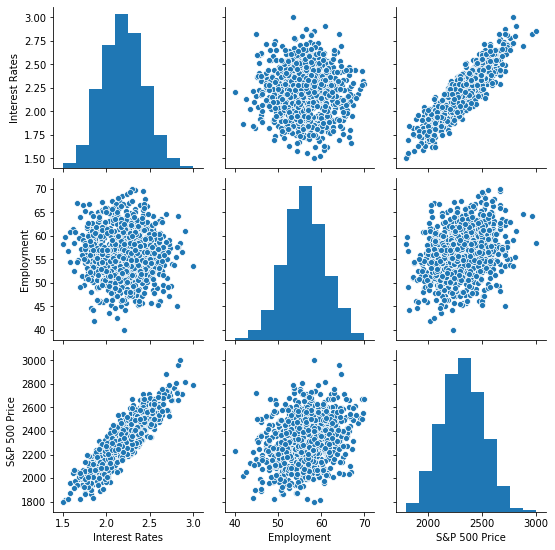

In [10]:
sns.pairplot(stock)

# TASK #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [11]:
y = stock['S&P 500 Price']

In [12]:
X = stock[['Interest Rates', 'Employment']]

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# TASK #4: TRAIN AND EVALUATE THE MACHINE LEARNING MODEL

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regressor = LinearRegression(fit_intercept =True)

In [18]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [731.66920576  12.00996005]
Linear Model Coefficient (b):  38.07280787402169


In [20]:
y_predict = regressor.predict(X_test)
y_predict

array([1969.42513717, 2281.63499211, 2007.16681763, 2203.67944963,
       2273.70768985, 2228.8430697 , 2069.09378309, 2449.1987337 ,
       2251.72190551, 2027.1127306 , 2408.3597496 , 2029.53845119,
       2511.30258486, 2059.89444171, 2373.55065938, 2106.59527181,
       2337.01510507, 2396.63541708, 2351.67777572, 2215.42825049,
       2510.29720592, 2247.16146894, 1906.97992318, 2347.96910062,
       2072.74482766, 2411.06260776, 2207.73727853, 2297.66798236,
       2423.7156744 , 2080.50729831, 2497.22805432, 2017.35784384,
       2091.70426767, 2351.02415099, 2042.42123764, 2375.32852313,
       2167.08299269, 2630.98254223, 2412.9998331 , 2512.29652867,
       2422.13425313, 2428.08542065, 2362.68698153, 2441.90543137,
       1862.19008567, 2024.94254574, 2405.3481399 , 2489.25722721,
       2054.95593905, 2433.14407214, 2180.96290964, 2440.59470469,
       2364.14972429, 2374.34726202, 2030.71672488, 2261.86465023,
       2167.70359688, 2518.10360152, 2246.81504728, 2400.12194

In [21]:
y_test

765    2014.227589
78     2372.122602
281    1953.971884
61     2166.298978
326    2348.263307
          ...     
210    2551.433973
58     2409.419529
413    2540.832079
945    2536.891206
753    2424.890502
Name: S&P 500 Price, Length: 200, dtype: float64

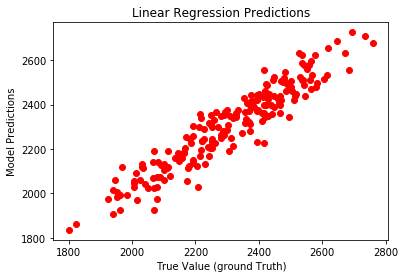

In [22]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel("Model Predictions")
plt.xlabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [23]:
k = X_test.shape[1]
n = len(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean( np.abs((y_test - y_predict) / y_test )) * 100

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMean Absolute Percentage Error =', MAPE, '%') 


RMSE = 63.415 
MSE = 4021.464292181956 
MAE = 51.62260884158919 
R2 = 0.8917647772681802 
Adjusted R2 = 0.8906659425196337 
Mean Absolute Percentage Error = 2.2534732437781857 %


# TASK #5: VISUALIZE THE RESULTS IN 3D

In [30]:
from mpl_toolkits.mplot3d import Axes3D

x_surf, y_surf = np.meshgrid(np.linspace(stock['Interest Rates'].min(), stock['Interest Rates'].max(), 100),np.linspace(stock['Employment'].min(), stock['Employment'].max(), 100))
x_surf.shape

(100, 100)

In [31]:
y_surf.shape

(100, 100)

In [32]:
onlyX = pd.DataFrame({'Interest Rates': x_surf.ravel(), 'Employment': y_surf.ravel()})
onlyX.shape

(10000, 2)

In [33]:
fittedY = regressor.predict(onlyX)
fittedY.shape

(10000,)

In [34]:
fittedY = fittedY.reshape(x_surf.shape)
fittedY.shape

(100, 100)

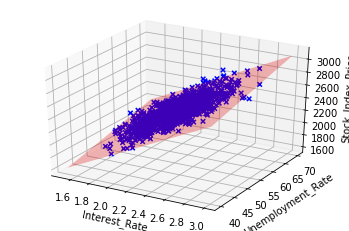

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stock['Interest Rates'],stock['Employment'],stock['S&P 500 Price'],c='blue', marker='x', alpha=1)
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest_Rate')
ax.set_ylabel('Unemployment_Rate')
ax.set_zlabel('Stock_Index_Price')
plt.show()

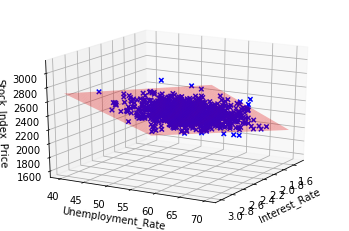

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stock['Interest Rates'],stock['Employment'],stock['S&P 500 Price'],c='blue', marker='x', alpha=1)
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest_Rate')
ax.set_ylabel('Unemployment_Rate')
ax.set_zlabel('Stock_Index_Price')
ax.view_init(20, 30)
plt.show()

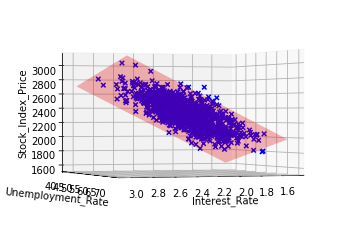

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stock['Interest Rates'],stock['Employment'],stock['S&P 500 Price'],c='blue', marker='x', alpha=1)
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest_Rate')
ax.set_ylabel('Unemployment_Rate')
ax.set_zlabel('Stock_Index_Price')
ax.view_init(0, 70)
plt.show()

In [38]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Interest Rates,727.332626
Employment,12.273708


# EXCELLENT JOB!